This notebook analyzes an e-commerce dataset that includes customer details, transactions, discounts, taxes, and marketing spend. We first clean and merge the datasets to build a reliable “master sales table” with correct revenue per transaction. Then we perform analysis to answer business questions on customer segmentation (RFM), revenue contribution by segment, retention (cohort analysis), lifetime value (LTV), seasonality by category and location, and daily/weekday sales patterns. The goal is to identify what drives revenue and propose strategies to improve retention and sales.

In [ ]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Read the CustomersData.xlsx file into a pandas DataFrame
customers = pd.read_excel("/content/CustomersData.xlsx")
# Display the first few rows of the DataFrame to inspect the data
customers

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49
...,...,...,...,...
1463,14438,F,New York,41
1464,12956,F,Chicago,48
1465,15781,M,New Jersey,19
1466,14410,F,New York,45


In [ ]:
# Display concise summary of the DataFrame, including data types and non-null values
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [ ]:
# Generate descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset's distribution
customers.describe()

,CustomerID,Tenure_Months
count,1468.000000,1468.000000
mean,15314.386240,25.912125
std,1744.000367,13.959667
min,12346.000000,2.000000
25%,13830.500000,14.000000
50%,15300.000000,26.000000
75%,16882.250000,38.000000
max,18283.000000,50.000000


In [ ]:
# Check for any missing values in each column of the DataFrame
customers.isnull().sum()

,0
CustomerID,0
Gender,0
Location,0
Tenure_Months,0


In [ ]:
# Count the number of unique values in each column
customers.nunique()

,0
CustomerID,1468
Gender,2
Location,5
Tenure_Months,49


In [ ]:
# Display the first 2 rows of the DataFrame
customers.head(2)
# Display the dimensions (rows, columns) of the DataFrame
customers.shape
# Check if all values in the 'CustomerID' column are unique
customers['CustomerID'].is_unique

True

In [ ]:
# Strip any leading/trailing whitespace from the column names for easier access and consistency
customers.columns = customers.columns.str.strip()

### Sales Dataset Overview

Now, let's perform similar exploratory data analysis steps for the `sales` dataset to understand its structure, content, and quality.

In [ ]:
sales = pd.read_csv("/content/Online_Sales.csv")
# Display the first few rows of the sales DataFrame to inspect the data
display(sales.head())

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [ ]:
# Display a concise summary of the sales DataFrame, including data types and non-null values
display(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


None

In [ ]:
# Generate descriptive statistics that summarize the central tendency, dispersion, and shape of the sales dataset's numerical distribution
display(sales.describe())

,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges
count,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000
mean,15346.70981,32409.825675,4.497638,52.237646,10.517630
std,1766.55602,8648.668977,20.104711,64.006882,19.475613
min,12346.00000,16679.000000,1.000000,0.390000,0.000000
25%,13869.00000,25384.000000,1.000000,5.700000,6.000000
50%,15311.00000,32625.500000,1.000000,16.990000,6.000000
75%,16996.25000,39126.250000,2.000000,102.130000,6.500000
max,18283.00000,48497.000000,900.000000,355.740000,521.360000


In [ ]:
# Check for any missing values in each column of the sales DataFrame
display(sales.isnull().sum())

,0
CustomerID,0
Transaction_ID,0
Transaction_Date,0
Product_SKU,0
Product_Description,0
Product_Category,0
Quantity,0
Avg_Price,0
Delivery_Charges,0
Coupon_Status,0


In [ ]:
#Get the value from sales which has null values
sales[sales.isnull().any(axis=1)]

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status


In [ ]:
#Drop the row will NaN values
critical_cols = [
    'Transaction_Date',
    'Product_SKU',
    'Product_Category',
    'Quantity',
    'Avg_Price'
]

sales = sales.dropna(subset=critical_cols)

In [ ]:
sales.isnull().sum()

,0
CustomerID,0
Transaction_ID,0
Transaction_Date,0
Product_SKU,0
Product_Description,0
Product_Category,0
Quantity,0
Avg_Price,0
Delivery_Charges,0
Coupon_Status,0


In [ ]:
# Count the number of unique values in each column of the sales DataFrame
display(sales.nunique())

,0
CustomerID,1468
Transaction_ID,25061
Transaction_Date,365
Product_SKU,1145
Product_Description,404
Product_Category,20
Quantity,151
Avg_Price,546
Delivery_Charges,267
Coupon_Status,3


In [ ]:
# Display the first 2 rows of the sales DataFrame
display(sales.head(2))
# Display the dimensions (rows, columns) of the sales DataFrame
display(sales.shape)
# Check if all values in a potential identifier column (e.g., 'Order ID') are unique.

# If 'Transaction_ID' does not exist, this will raise a KeyError.
display(sales['Transaction_ID'].is_unique)
if 'Transaction_ID' in sales.columns:
    print(f"'Transaction_ID' column is unique: {sales['Transaction_ID'].is_unique}")
else:
    print("No 'Transaction_ID' column found. Please inspect the DataFrame columns for a suitable unique identifier.")

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used


(52924, 10)

False

'Transaction_ID' column is unique: False


In [ ]:
# Strip any leading/trailing whitespace from the column names of the sales DataFrame for easier access and consistency
sales.columns = sales.columns.str.strip()
display(sales.columns)

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status'],
      dtype='object')

In [ ]:
sales.duplicated().sum()

np.int64(0)

### Marketing Spend (`mkt`) Dataset Overview

Let's now perform exploratory data analysis for the `mkt` dataset to understand its structure and content.

In [ ]:
mkt = pd.read_csv('/content/Marketing_Spend.csv')

In [ ]:
# Display the first few rows of the mkt DataFrame to inspect the data
display(mkt.head())

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [ ]:
# Display a concise summary of the mkt DataFrame, including data types and non-null values
display(mkt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


None

In [ ]:
# Generate descriptive statistics that summarize the central tendency, dispersion, and shape of the mkt dataset's numerical distribution
display(mkt.describe())

,Offline_Spend,Online_Spend
count,365.000000,365.000000
mean,2843.561644,1905.880740
std,952.292448,808.856853
min,500.000000,320.250000
25%,2500.000000,1258.600000
50%,3000.000000,1881.940000
75%,3500.000000,2435.120000
max,5000.000000,4556.930000


In [ ]:
# Check for any missing values in each column of the mkt DataFrame
display(mkt.isnull().sum())

,0
Date,0
Offline_Spend,0
Online_Spend,0


In [ ]:
# Count the number of unique values in each column of the mkt DataFrame
display(mkt.nunique())

,0
Date,365
Offline_Spend,11
Online_Spend,365


In [ ]:
# Display the first 2 rows of the mkt DataFrame
display(mkt.head(2))
# Display the dimensions (rows, columns) of the mkt DataFrame
display(mkt.shape)
# Check if there's a unique identifier column like 'Date'.
# If 'Date' does not exist, this will raise a KeyError.
if 'Date' in mkt.columns:
    print(f"'Date' column has unique values: {mkt['Date'].is_unique}")
else:
    print("No 'Date' column found. Please inspect the DataFrame columns for a suitable unique identifier.")

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36


(365, 3)

'Date' column has unique values: True


In [ ]:
# Strip any leading/trailing whitespace from the column names of the mkt DataFrame for easier access and consistency
mkt.columns = mkt.columns.str.strip()
display(mkt.columns)

Index(['Date', 'Offline_Spend', 'Online_Spend'], dtype='object')

### Discount Coupon (`coupons`) Dataset Overview

Let's continue by performing exploratory data analysis for the `coupons` dataset to understand its structure and content.

In [ ]:
coupons = pd.read_csv('/content/Discount_Coupon.csv')

In [ ]:
# Display the first few rows of the coupons DataFrame to inspect the data
display(coupons.head())

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [ ]:
# Display a concise summary of the coupons DataFrame, including data types and non-null values
display(coupons.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


None

In [ ]:
# Generate descriptive statistics that summarize the central tendency, dispersion, and shape of the coupons dataset's numerical distribution
display(coupons.describe())

,Discount_pct
count,204.000000
mean,20.000000
std,8.185052
min,10.000000
25%,10.000000
50%,20.000000
75%,30.000000
max,30.000000


In [ ]:
# Check for any missing values in each column of the coupons DataFrame
display(coupons.isnull().sum())

,0
Month,0
Product_Category,0
Coupon_Code,0
Discount_pct,0


In [ ]:
# Count the number of unique values in each column of the coupons DataFrame
display(coupons.nunique())

,0
Month,12
Product_Category,17
Coupon_Code,48
Discount_pct,3


In [ ]:
# Display the first 2 rows of the coupons DataFrame
display(coupons.head(2))
# Display the dimensions (rows, columns) of the coupons DataFrame
display(coupons.shape)
# Check for a potential unique identifier column. For coupons, 'Coupon_Code' might be unique.
# If 'Coupon_Code' does not exist, this will raise a KeyError.
if 'Coupon_Code' in coupons.columns:
    print(f"'Coupon_Code' column has unique values: {coupons['Coupon_Code'].is_unique}")
else:
    print("No 'Coupon_Code' column found. Please inspect the DataFrame columns for a suitable unique identifier.")

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20


(204, 4)

'Coupon_Code' column has unique values: False


In [ ]:
# Strip any leading/trailing whitespace from the column names of the coupons DataFrame for easier access and consistency
coupons.columns = coupons.columns.str.strip()
display(coupons.columns)

Index(['Month', 'Product_Category', 'Coupon_Code', 'Discount_pct'], dtype='object')

### Tax Amount (`tax`) Dataset Overview

Finally, let's perform exploratory data analysis for the `tax` dataset to understand its structure and content.

In [ ]:
tax= pd.read_excel('/content/Tax_amount.xlsx')

In [ ]:
# Display the first few rows of the tax DataFrame to inspect the data
display(tax.head())

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [ ]:
# Display a concise summary of the tax DataFrame, including data types and non-null values
display(tax.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


None

In [ ]:
# Generate descriptive statistics that summarize the central tendency, dispersion, and shape of the tax dataset's numerical distribution
display(tax.describe())

,GST
count,20.000000
mean,0.116500
std,0.052443
min,0.050000
25%,0.087500
50%,0.100000
75%,0.180000
max,0.180000


In [ ]:
# Check for any missing values in each column of the tax DataFrame
display(tax.isnull().sum())

,0
Product_Category,0
GST,0


In [ ]:
# Count the number of unique values in each column of the tax DataFrame
display(tax.nunique())

,0
Product_Category,20
GST,4


In [ ]:
# Display the first 2 rows of the tax DataFrame
display(tax.head(2))
# Display the dimensions (rows, columns) of the tax DataFrame
display(tax.shape)
# Check for a potential unique identifier column. For tax, 'Product_Category' might be a key.
# If 'Product_Category' does not exist, this will raise a KeyError.
if 'Product_Category' in tax.columns:
    print(f"'Product_Category' column has unique values: {tax['Product_Category'].is_unique}")
else:
    print("No 'Product_Category' column found. Please inspect the DataFrame columns for a suitable unique identifier.")

,Product_Category,GST
0,Nest-USA,0.1
1,Office,0.1


(20, 2)

'Product_Category' column has unique values: True


In [ ]:
# Strip any leading/trailing whitespace from the column names of the tax DataFrame for easier access and consistency
tax.columns = tax.columns.str.strip()
display(tax.columns)

Index(['Product_Category', 'GST'], dtype='object')

In [ ]:
# --- Data Prep / Feature Engineering (run AFTER all datasets are loaded) ---

# Convert the 'Transaction_Date' column in the sales DataFrame to datetime objects.
# The 'errors="coerce"' argument will turn any unparseable dates into NaT (Not a Time).
sales['Transaction_Date'] = pd.to_datetime(sales['Transaction_Date'], errors='coerce')

# Create new time-based features from the 'Transaction_Date' column for easier analysis:
# 'Month': Extract the abbreviated month name (e.g., Jan, Feb).
sales['Month'] = sales['Transaction_Date'].dt.strftime('%b')
# 'Year': Extract the full year (e.g., 2019).
sales['Year']  = sales['Transaction_Date'].dt.year
# 'Month_Num': Extract the numeric month (1-12), useful for sorting chronologically.
sales['Month_Num'] = sales['Transaction_Date'].dt.month

# Clean key categorical columns ('Month' and 'Product_Category') in both 'sales' and 'coupons' DataFrames.
# This involves converting them to string type and removing any leading/trailing whitespace,
# ensuring consistency and accuracy for subsequent merges or analyses.
for df in [sales, coupons]:
    df['Month'] = df['Month'].astype(str).str.strip()
    df['Product_Category'] = df['Product_Category'].astype(str).str.strip()

In [ ]:
# Check for any missing values in the 'Transaction_Date' column after conversion
sales['Transaction_Date'].isna().sum()

np.int64(0)

In [ ]:
# Merge the 'sales' DataFrame with relevant columns from the 'coupons' DataFrame.
# This operation adds discount percentage information to each sales record.
sales = pd.merge(
    sales,
    # Select 'Month', 'Product_Category', and 'Discount_pct' from the 'coupons' DataFrame.
    coupons[['Month','Product_Category','Discount_pct']],
    # Perform the merge based on matching 'Month' and 'Product_Category'.
    on=['Month','Product_Category'],
    # Use a 'left' merge to keep all records from the 'sales' DataFrame,
    # and only add matching discount information from 'coupons'.
    how='left'
)
sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Year,Month_Num,Discount_pct
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019,1,10.0
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019,1,10.0
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,2019,1,10.0
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,2019,1,10.0
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,2019,1,10.0


In [ ]:
# Get unique product categories from online_sales where Discount_pct is NaN
missing_discount_categories = sales[sales['Discount_pct'].isnull()]['Product_Category'].unique()
print(f"Product Categories with missing discounts: {missing_discount_categories}")

Product Categories with missing discounts: ['Fun' 'Backpacks' 'Google' 'More Bags']


These categories don't exist in the coupons table: ['Fun' 'Backpacks' 'Google' 'More Bags']

In [ ]:
# Check how many rows didn’t find a discount after the merge. This calculates the proportion of missing 'Discount_pct' values.
#If it’s >0 → some Month+Category combos don’t exist in coupons
display(sales['Discount_pct'].isna().sum())
sales['Discount_pct'].describe()

np.int64(400)

,Discount_pct
count,52524.000000
mean,19.953164
std,8.127280
min,10.000000
25%,10.000000
50%,20.000000
75%,30.000000
max,30.000000


In [ ]:
sales['Discount_pct'] = sales['Discount_pct'].fillna(0)

In [ ]:
# Merge GST (tax rate) into the sales table using Product_Category as the key.
# - We use a LEFT join so we keep every sales row.
# - If a category is missing in the tax table, GST will become NaN for that row.
sales = pd.merge(
    sales,                      # left table (main dataset)
    tax[['Product_Category','GST']],  # bring only needed columns from tax
    on='Product_Category',       # common column to match rows
    how='left'                   # keep all rows from sales
)

# Quick sanity checks (optional but helpful)
# 1) How many rows didn't find a GST match?
display(sales['GST'].isna().sum())

# 2) Look at a few rows to confirm GST got added
sales[['Product_Category', 'GST']].head()

np.int64(0)

,Product_Category,GST
0,Nest-USA,0.10
1,Nest-USA,0.10
2,Office,0.10
3,Apparel,0.18
4,Bags,0.18


In [ ]:
# Discount percentage that was actually applied (only when coupon was Used)
sales['Applied_Discount_Pct'] = np.where(
    sales['Coupon_Status'].eq('Used'),
    sales['Discount_pct'],
    0
)


In [ ]:
# Calculate the 'Discount_rate' by dividing 'Applied_Discount_Pct' by 100 to convert the percentage to a decimal.
sales['Discount_rate'] = sales['Applied_Discount_Pct'] / 100
sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Year,Month_Num,Discount_pct,GST,Applied_Discount_Pct,Discount_rate
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019,1,10.0,0.10,10.0,0.1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019,1,10.0,0.10,10.0,0.1
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,2019,1,10.0,0.10,10.0,0.1
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,2019,1,10.0,0.18,0.0,0.0
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,2019,1,10.0,0.18,10.0,0.1


In [ ]:
sales['Invoice_Value'] = (
    (sales['Quantity'] * sales['Avg_Price']) # Calculate the base price of the items
    * (1 - sales['Discount_rate'])          # Apply the discount based on the discount rate
    * (1 + sales['GST'])                    # Add Goods and Services Tax (GST) to the discounted price
    + sales['Delivery_Charges']             # Add delivery charges to the total
)
sales['Invoice_Value'] = sales['Invoice_Value'].round(2) # Round the final invoice value to two decimal places
sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Year,Month_Num,Discount_pct,GST,Applied_Discount_Pct,Discount_rate,Invoice_Value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019,1,10.0,0.10,10.0,0.1,158.67
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019,1,10.0,0.10,10.0,0.1,158.67
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,2019,1,10.0,0.10,10.0,0.1,8.53
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,2019,1,10.0,0.18,0.0,0.0,109.93
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,2019,1,10.0,0.18,10.0,0.1,24.02


In [ ]:
sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Year,Month_Num,Discount_pct,GST,Applied_Discount_Pct,Discount_rate,Invoice_Value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019,1,10.0,0.10,10.0,0.1,158.67
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019,1,10.0,0.10,10.0,0.1,158.67
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,2019,1,10.0,0.10,10.0,0.1,8.53
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,2019,1,10.0,0.18,0.0,0.0,109.93
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,2019,1,10.0,0.18,10.0,0.1,24.02


In [ ]:
# =========================
# Acquisition base table
# =========================
# Acquisition = a customer's FIRST purchase in the dataset.
# So we find the earliest transaction date for each CustomerID.

# Keep data ordered by customer + date (good practice before using min/first)
sales_sorted = sales.sort_values(["CustomerID", "Transaction_Date"])

# One row per customer: earliest transaction = First_Purchase_Date
customer_first_purchase = (
    sales_sorted.groupby("CustomerID", as_index=False)["Transaction_Date"]
    .min()
    .rename(columns={"Transaction_Date": "First_Purchase_Date"})
)

# Add acquisition month/year fields for monthly trend analysis
customer_first_purchase["Acq_Month"] = customer_first_purchase["First_Purchase_Date"].dt.strftime("%b")
customer_first_purchase["Acq_Year"] = customer_first_purchase["First_Purchase_Date"].dt.year
customer_first_purchase["Acq_Month_Num"] = customer_first_purchase["First_Purchase_Date"].dt.month

customer_first_purchase.head()

,CustomerID,First_Purchase_Date,Acq_Month,Acq_Year,Acq_Month_Num
0,12346,2019-09-15,Sep,2019,9
1,12347,2019-03-24,Mar,2019,3
2,12348,2019-06-22,Jun,2019,6
3,12350,2019-12-14,Dec,2019,12
4,12356,2019-09-15,Sep,2019,9


In [ ]:
# =========================
# Monthly acquisition trend
# =========================
# Count how many unique customers were acquired each month.

monthly_acquisition = (
    customer_first_purchase.groupby(["Acq_Year", "Acq_Month_Num", "Acq_Month"])["CustomerID"]
    .nunique()
    .reset_index(name="New_Customers")
    .sort_values(["Acq_Year", "Acq_Month_Num"])
)

monthly_acquisition

,Acq_Year,Acq_Month_Num,Acq_Month,New_Customers
0,2019,1,Jan,215
1,2019,2,Feb,96
2,2019,3,Mar,177
3,2019,4,Apr,163
4,2019,5,May,112
5,2019,6,Jun,137
6,2019,7,Jul,94
7,2019,8,Aug,135
8,2019,9,Sep,78
9,2019,10,Oct,87


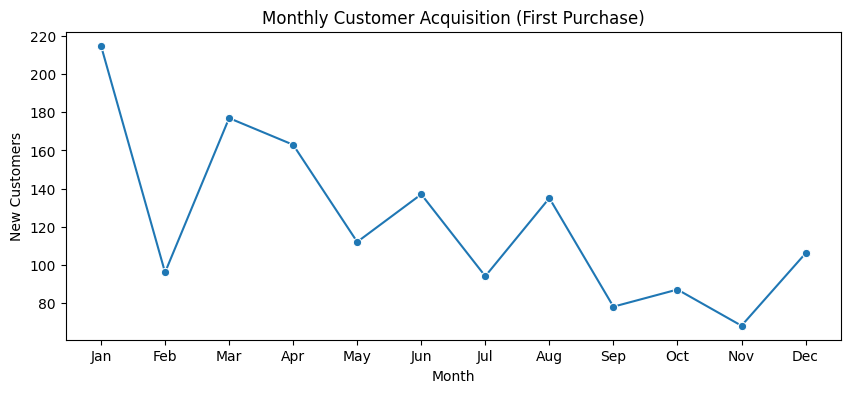

In [ ]:
# --- Acquisition Trend (First Purchase) ---
# Goal: Count how many customers were acquired each month.
# Definition: "Acquired" = customer's first-ever transaction month.
# We then plot the monthly acquisition trend to identify peak and low months.

plt.figure(figsize=(10,4))
sns.lineplot(
    data=monthly_acquisition,
    x="Acq_Month",
    y="New_Customers",
    marker="o"
)
plt.title("Monthly Customer Acquisition (First Purchase)")
plt.xlabel("Month")
plt.ylabel("New Customers")
plt.show()

In [ ]:
# ------------------------------------------------------------
# Monthly Business KPIs from Sales Data
# Goal:
#   Summarize overall performance per month.
#
# Metrics:
#   - Revenue: total invoice value in the month
#   - Orders: unique transaction count in the month
#   - Active_Customers: unique customers who purchased in the month
# Output:
#   A month-level KPI table built from the transactional sales dataset
# ------------------------------------------------------------
monthly_sales = (
    sales.groupby(["Year", "Month_Num", "Month"])
        .agg(
            Revenue=("Invoice_Value", "sum"),
            Orders=("Transaction_ID", "nunique"),
            Active_Customers=("CustomerID", "nunique")
        )
        .reset_index()
        .sort_values(["Year", "Month_Num"])
)

monthly_sales.head()

,Year,Month_Num,Month,Revenue,Orders,Active_Customers
0,2019,1,Jan,494089.90,2102,215
1,2019,2,Feb,375162.79,1664,109
2,2019,3,Mar,415159.19,1991,208
3,2019,4,Apr,477498.95,1813,224
4,2019,5,May,365596.66,2034,200


In [ ]:
# ------------------------------------------------------------
# Monthly Marketing Spend
# Goal:
#   Convert daily marketing spend into month-level totals so we can
#   compare spend vs acquisition and revenue.
#
# Metrics:
#   - Offline_Spend, Online_Spend, Total_Spend
# Output:
#   monthly_marketing (Month-level spend table)
# ------------------------------------------------------------
mkt["Date"] = pd.to_datetime(mkt["Date"], errors="coerce")
mkt["Year"] = mkt["Date"].dt.year
mkt["Month_Num"] = mkt["Date"].dt.month
mkt["Month"] = mkt["Date"].dt.strftime("%b")

monthly_mkt = (
    mkt.groupby(["Year", "Month_Num", "Month"])
       .agg(
           Offline_Spend=("Offline_Spend", "sum"),
           Online_Spend=("Online_Spend", "sum")
       )
       .reset_index()
)
monthly_mkt["Total_Spend"] = monthly_mkt["Offline_Spend"] + monthly_mkt["Online_Spend"]
monthly_mkt = monthly_mkt.sort_values(["Year", "Month_Num"])

monthly_mkt.head()

,Year,Month_Num,Month,Offline_Spend,Online_Spend,Total_Spend
0,2019,1,Jan,96600,58328.95,154928.95
1,2019,2,Feb,81300,55807.92,137107.92
2,2019,3,Mar,73500,48750.09,122250.09
3,2019,4,Apr,96000,61026.83,157026.83
4,2019,5,May,65500,52759.64,118259.64


In [ ]:
print(monthly_acquisition.duplicated(["Acq_Year","Acq_Month_Num"]).sum())
print(monthly_sales.duplicated(["Year","Month_Num"]).sum())
print(monthly_mkt.duplicated(["Year","Month_Num"]).sum())

0
0
0


In [ ]:
# ============================================================
# Monthly Master Table (Joined View)
# Goal: Bring all month-level metrics into ONE table so we can
# answer Q1/Q2 (and many later questions) in one place.
#
# Inputs:
# - monthly_acquisition: new customers by acquisition month
# - monthly_sales: revenue / orders / active customers by month
# - monthly_mkt: offline + online + total marketing spend by month
#
# Join keys:
# - Year + Month_Num + Month name
#   (We keep Month_Num for correct Jan→Dec sorting)
# ============================================================
monthly_master = (
    monthly_acquisition
    # 1) Add monthly sales KPIs
    .merge(
        monthly_sales,
        left_on=["Acq_Year", "Acq_Month_Num", "Acq_Month"],
        right_on=["Year", "Month_Num", "Month"],
        how="left"
    )
    # 2) Add monthly marketing spend
    .merge(
        monthly_mkt,
        left_on=["Acq_Year", "Acq_Month_Num", "Acq_Month"],
        right_on=["Year", "Month_Num", "Month"],
        how="left",
        suffixes=("", "_mkt")
    )
)

# Keep only the columns we’ll actually use downstream (clean final output)
monthly_master = (
    monthly_master[
        [
            "Acq_Year", "Acq_Month_Num", "Acq_Month", "New_Customers",
            "Revenue", "Orders", "Active_Customers",
            "Offline_Spend", "Online_Spend", "Total_Spend"
        ]
    ]
    # Ensure rows are in calendar order
    .sort_values(["Acq_Year", "Acq_Month_Num"])
    .reset_index(drop=True)
)

monthly_master.head()

,Acq_Year,Acq_Month_Num,Acq_Month,New_Customers,Revenue,Orders,Active_Customers,Offline_Spend,Online_Spend,Total_Spend
0,2019,1,Jan,215,494089.90,2102,215,96600,58328.95,154928.95
1,2019,2,Feb,96,375162.79,1664,109,81300,55807.92,137107.92
2,2019,3,Mar,177,415159.19,1991,208,73500,48750.09,122250.09
3,2019,4,Apr,163,477498.95,1813,224,96000,61026.83,157026.83
4,2019,5,May,112,365596.66,2034,200,65500,52759.64,118259.64


In [ ]:
display(monthly_master.sort_values("New_Customers", ascending=False).head(3))
display(monthly_master.sort_values("New_Customers", ascending=True).head(3))

,Acq_Year,Acq_Month_Num,Acq_Month,New_Customers,Revenue,Orders,Active_Customers,Offline_Spend,Online_Spend,Total_Spend
0,2019,1,Jan,215,494089.90,2102,215,96600,58328.95,154928.95
2,2019,3,Mar,177,415159.19,1991,208,73500,48750.09,122250.09
3,2019,4,Apr,163,477498.95,1813,224,96000,61026.83,157026.83


,Acq_Year,Acq_Month_Num,Acq_Month,New_Customers,Revenue,Orders,Active_Customers,Offline_Spend,Online_Spend,Total_Spend
10,2019,11,Nov,68,547788.30,2282,188,93000,68144.96,161144.96
8,2019,9,Sep,78,396510.89,1932,193,83000,52514.54,135514.54
9,2019,10,Oct,87,480767.62,2125,210,93500,57724.65,151224.65


In [ ]:
# ----- Efficiency Metrics -----

# Cost per acquisition (how much we spent to get 1 new customer)
monthly_master["CPA"] = round(monthly_master["Total_Spend"] / monthly_master["New_Customers"],2)

# Marketing ROI (%) using your definition
monthly_master["ROI_pct"] = round((monthly_master["Revenue"] - monthly_master["Total_Spend"]) * 100 / monthly_master["Total_Spend"],2)

monthly_master[["Acq_Month", "New_Customers", "Revenue", "Total_Spend", "CPA", "ROI_pct"]]

,Acq_Month,New_Customers,Revenue,Total_Spend,CPA,ROI_pct
0,Jan,215,494089.90,154928.95,720.60,218.91
1,Feb,96,375162.79,137107.92,1428.21,173.63
2,Mar,177,415159.19,122250.09,690.68,239.60
3,Apr,163,477498.95,157026.83,963.35,204.09
4,May,112,365596.66,118259.64,1055.89,209.15
5,Jun,137,361000.72,134318.14,980.42,168.77
6,Jul,94,451878.77,120217.85,1278.91,275.88
7,Aug,135,475796.39,142904.15,1058.55,232.95
8,Sep,78,396510.89,135514.54,1737.37,192.60
9,Oct,87,480767.62,151224.65,1738.21,217.92


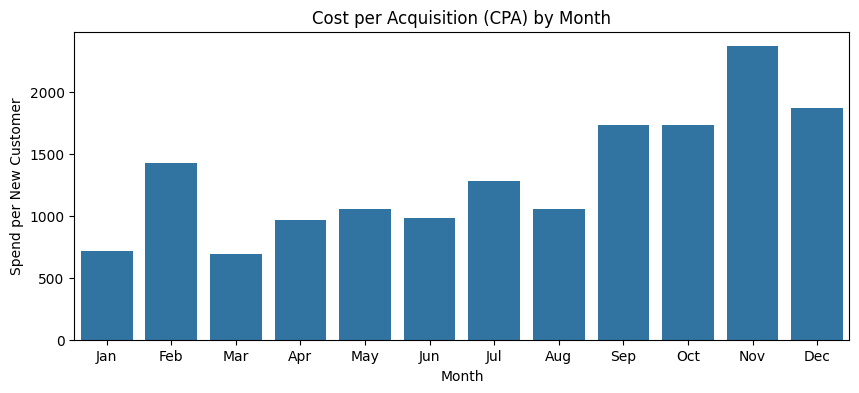

In [ ]:
# ensure month order is correct
month_order = (
    monthly_master.sort_values("Acq_Month_Num")["Acq_Month"]
    .drop_duplicates()
    .tolist()
)
monthly_master["Acq_Month"] = pd.Categorical(monthly_master["Acq_Month"], categories=month_order, ordered=True)

plt.figure(figsize=(10,4))
sns.barplot(data=monthly_master, x="Acq_Month", y="CPA")
plt.title("Cost per Acquisition (CPA) by Month")
plt.xlabel("Month")
plt.ylabel("Spend per New Customer")
plt.show()

In [ ]:
monthly_master.sort_values("CPA", ascending=False)[["Acq_Month","New_Customers","Total_Spend","CPA","ROI_pct"]].head(3)

,Acq_Month,New_Customers,Total_Spend,CPA,ROI_pct
10,Nov,68,161144.96,2369.78,239.94
11,Dec,106,198648.75,1874.04,179.95
9,Oct,87,151224.65,1738.21,217.92


In [ ]:
monthly_master.sort_values("CPA", ascending=True)[["Acq_Month","New_Customers","Total_Spend","CPA","ROI_pct"]].head(3)

,Acq_Month,New_Customers,Total_Spend,CPA,ROI_pct
2,Mar,177,122250.09,690.68,239.60
0,Jan,215,154928.95,720.60,218.91
3,Apr,163,157026.83,963.35,204.09


Q1: Highest + lowest acquisition

High acquisition months
	•	Jan (215), Mar (177), Apr (163)

Low acquisition months
	•	Nov (68), Sep (78), Oct (87), Jul (94), Feb (96)

- Highest new customers: Jan (215)
- Lowest new customers: Nov (68)

Strategy:
- Jan is strong and has a good CPA (~720) → “scale what worked”
- Nov is weak and CPA is worst (~2369) → “spend is not converting; fix targeting/offer before spending more”

Q2. Insights
- Jan and Mar brought in a lot of new customers with low CPA, so they’re strong months to scale.
- Oct–Dec have high CPA, meaning we’re paying more per new customer there. That’s where we should tighten targeting/creative/offer or shift spend.

Nov has high ROI but also very high CPA → revenue is strong relative to spend, but new customer volume is low, so the spend is not translating into many first-time buyers. That’s a “good efficiency on revenue, weak on acquisition volume” month.

In [ ]:
# ============================================================
# Q3) Month-to-Month Retention (Month X → Month X+1)
# ============================================================
# Goal:
#   For each month, calculate what % of customers return the next month.
#
# Definition:
#   Retention rate (X → X+1) =
#       (# customers active in month X who also appear in month X+1)
#       / (total # customers active in month X) * 100
#
# Output:
#   retention_df with:
#     - Month (X)
#     - Customers_Month_X (unique customers in month X)
#     - Customers_Retained_X_to_Xplus1 (returned next month)
#     - Retention_Rate (%)
# ============================================================

# 1) Build a month-level table of unique customers
#    We store each month’s customers as a Python set so we can do fast intersections.

monthly_customers = (
    sales.dropna(subset=["CustomerID", "Year", "Month_Num"])
        .groupby(["Year", "Month_Num", "Month"])["CustomerID"]
        .apply(lambda s: set(s.unique()))
        .reset_index(name="Customer_Set")
        .sort_values(["Year", "Month_Num"])
        .reset_index(drop=True)
)

monthly_customers.head()

,Year,Month_Num,Month,Customer_Set
0,2019,1,Jan,"{17920, 14849, 15363, 17924, 17925, 17412, 174..."
1,2019,2,Feb,"{13831, 15880, 16905, 16393, 15373, 13838, 158..."
2,2019,3,Mar,"{17920, 16898, 14850, 13319, 12808, 14344, 158..."
3,2019,4,Apr,"{16385, 16898, 17411, 13319, 15881, 16907, 133..."
4,2019,5,May,"{15361, 16899, 16393, 15881, 13324, 17404, 179..."


In [ ]:
# ------------------------------------------------------------
# Retention summary (Month X -> Month X+1)
# Goal:
#   Find which months have the strongest and weakest retention.
#   Each row in retention_df represents customers from Month X
#   who returned in Month X+1, as a percentage of Month X customers.
# ------------------------------------------------------------

retention_rows = []

for i in range(len(monthly_customers) - 1):
    curr = monthly_customers.loc[i, "Customer_Set"]
    nxt  = monthly_customers.loc[i + 1, "Customer_Set"]

    retained = len(curr.intersection(nxt))
    total = len(curr)
    retention_rate = (retained / total) * 100 if total > 0 else 0

    retention_rows.append({
        "Year": monthly_customers.loc[i, "Year"],
        "Month_Num": monthly_customers.loc[i, "Month_Num"],
        "Month": monthly_customers.loc[i, "Month"],
        "Customers_Month_X": total,
        "Customers_Retained_X_to_Xplus1": retained,
        "Retention_Rate": round(retention_rate, 2)
    })

retention_df = pd.DataFrame(retention_rows)
retention_df

,Year,Month_Num,Month,Customers_Month_X,Customers_Retained_X_to_Xplus1,Retention_Rate
0,2019,1,Jan,215,13,6.05
1,2019,2,Feb,109,11,10.09
2,2019,3,Mar,208,24,11.54
3,2019,4,Apr,224,25,11.16
4,2019,5,May,200,37,18.50
5,2019,6,Jun,259,58,22.39
6,2019,7,Jul,236,65,27.54
7,2019,8,Aug,300,44,14.67
8,2019,9,Sep,193,29,15.03
9,2019,10,Oct,210,31,14.76


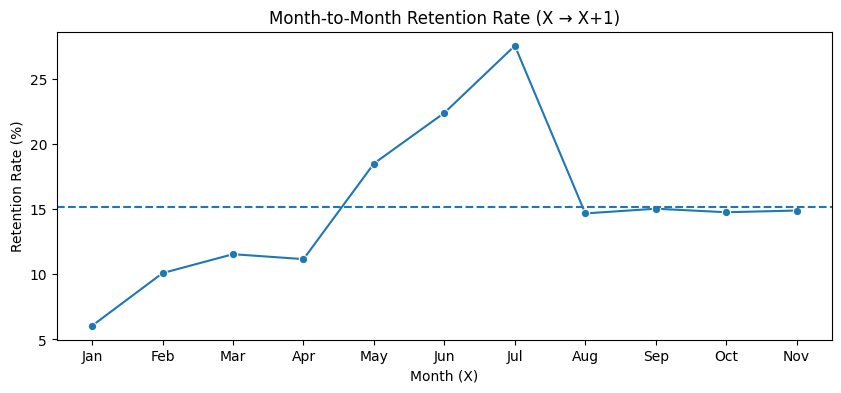

np.float64(15.147272727272728)

In [ ]:
avg_ret = retention_df["Retention_Rate"].mean()

plt.figure(figsize=(10,4))
sns.lineplot(data=retention_df, x="Month", y="Retention_Rate", marker="o")
plt.axhline(avg_ret, linestyle="--")
plt.title("Month-to-Month Retention Rate (X → X+1)")
plt.xlabel("Month (X)")
plt.ylabel("Retention Rate (%)")
plt.show()

avg_ret

In [ ]:
# Top 3 retention months (best)
retention_df.sort_values("Retention_Rate", ascending=False).head(3)

,Year,Month_Num,Month,Customers_Month_X,Customers_Retained_X_to_Xplus1,Retention_Rate
6,2019,7,Jul,236,65,27.54
5,2019,6,Jun,259,58,22.39
4,2019,5,May,200,37,18.50


In [ ]:
# Bottom 3 retention months (worst)
retention_df.sort_values("Retention_Rate", ascending=True).head(3)

,Year,Month_Num,Month,Customers_Month_X,Customers_Retained_X_to_Xplus1,Retention_Rate
0,2019,1,Jan,215,13,6.05
1,2019,2,Feb,109,11,10.09
3,2019,4,Apr,224,25,11.16


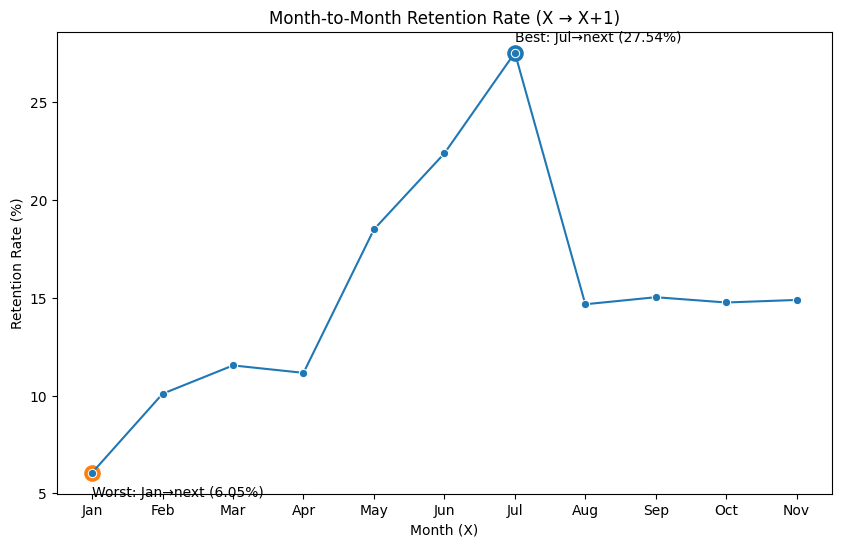

In [ ]:
# ------------------------------------------------------------
# Retention plot with best/worst month highlighted
# ------------------------------------------------------------

# Find best & worst months (Month X)
best_row = retention_df.loc[retention_df["Retention_Rate"].idxmax()]
worst_row = retention_df.loc[retention_df["Retention_Rate"].idxmin()]

plt.figure(figsize=(10,6))

# Main line
sns.lineplot(data=retention_df, x="Month", y="Retention_Rate", marker="o")

# Highlight best point
plt.scatter(best_row["Month"], best_row["Retention_Rate"], s=120)
plt.text(best_row["Month"], best_row["Retention_Rate"] + 0.6,
         f'Best: {best_row["Month"]}→next ({best_row["Retention_Rate"]}%)')

# Highlight worst point
plt.scatter(worst_row["Month"], worst_row["Retention_Rate"], s=120)
plt.text(worst_row["Month"], worst_row["Retention_Rate"] - 1.2,
         f'Worst: {worst_row["Month"]}→next ({worst_row["Retention_Rate"]}%)')

plt.title("Month-to-Month Retention Rate (X → X+1)")
plt.xlabel("Month (X)")
plt.ylabel("Retention Rate (%)")
plt.show()

Looking at month-to-month retention (Month X → Month X+1), the strongest retention happens in the middle of the year. The best period is Jul→Aug at 27.54% (65 customers returned out of 236). This is followed by Jun→Jul at 22.39% and May→Jun at 18.50%.

The weakest retention is at the start of the year. The lowest is Jan→Feb at 6.05% (13 out of 215 customers came back), then Feb→Mar at 10.09%, and Apr→May at 11.16%.

Overall, retention steadily improves from January through July (6.05% → 27.54%), then drops sharply in August (14.67%) and stays fairly flat around 14–15% through November.

To improve retention in weaker months (especially Jan→Feb), we should focus on getting customers to place a second order quickly. A practical approach is a “second purchase push” — follow-up messaging after the first order, personalized recommendations based on what they bought, and a small time-bound incentive that’s valid in the next month. We should also reduce friction for repeat purchases (easy re-order, clear delivery timelines, and customer support visibility).

For the stronger retention period (May→Aug, especially Jul→Aug), we should identify what was different in those months (product categories purchased, coupon usage, and order value) and replicate the same winning patterns in the lower-retention months.

In [ ]:
sales.head()


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Year,Month_Num,Discount_pct,GST,Applied_Discount_Pct,Discount_rate,Invoice_Value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019,1,10.0,0.10,10.0,0.1,158.67
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019,1,10.0,0.10,10.0,0.1,158.67
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,2019,1,10.0,0.10,10.0,0.1,8.53
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,2019,1,10.0,0.18,0.0,0.0,109.93
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,2019,1,10.0,0.18,10.0,0.1,24.02


In [ ]:
# ------------------------------------------------------------
# Q3 Prep: Label each transaction as coming from a New vs Existing customer
# Definition:
#   New customer month = the month of the customer's first-ever purchase
#   Existing customer month = any later month where the customer buys again
# ------------------------------------------------------------

# Create a month key we can group on (year-month as a period)
sales["Txn_Month"] = sales["Transaction_Date"].dt.to_period("M")

# Find each customer's first purchase month
first_month = (
    sales.groupby("CustomerID")["Txn_Month"]
    .min()
    .reset_index()
    .rename(columns={"Txn_Month": "First_Txn_Month"})
)

# Merge back to sales
sales = sales.merge(first_month, on="CustomerID", how="left")

# Label each row
sales["Customer_Type"] = np.where(
    sales["Txn_Month"] == sales["First_Txn_Month"],
    "New",
    "Existing"
)

sales[["CustomerID", "Transaction_Date", "Txn_Month", "First_Txn_Month", "Customer_Type", "Invoice_Value"]].head()

,CustomerID,Transaction_Date,Txn_Month,First_Txn_Month,Customer_Type,Invoice_Value
0,17850,2019-01-01,2019-01,2019-01,New,158.67
1,17850,2019-01-01,2019-01,2019-01,New,158.67
2,17850,2019-01-01,2019-01,2019-01,New,8.53
3,17850,2019-01-01,2019-01,2019-01,New,109.93
4,17850,2019-01-01,2019-01,2019-01,New,24.02


In [ ]:
# ------------------------------------------------------------
# Q3 Table: Monthly revenue split by New vs Existing customers
# ------------------------------------------------------------

monthly_rev_split = (
    sales.groupby(["Txn_Month", "Customer_Type"])["Invoice_Value"]
    .sum()
    .reset_index()
)

# Pivot to get columns: New revenue, Existing revenue
monthly_rev_pivot = (
    monthly_rev_split.pivot(index="Txn_Month", columns="Customer_Type", values="Invoice_Value")
    .fillna(0)
    .reset_index()
)

# Add totals and share (helps interpretation)
monthly_rev_pivot["Total_Revenue"] = monthly_rev_pivot.get("New", 0) + monthly_rev_pivot.get("Existing", 0)
monthly_rev_pivot["New_Revenue_Share"] = np.where(
    monthly_rev_pivot["Total_Revenue"] > 0,
    monthly_rev_pivot.get("New", 0) / monthly_rev_pivot["Total_Revenue"],
    0
)

monthly_rev_pivot

Customer_Type,Txn_Month,Existing,New,Total_Revenue,New_Revenue_Share
0,2019-01,0.00,494089.90,494089.90,1.000000
1,2019-02,46524.70,328638.09,375162.79,0.875988
2,2019-03,68930.38,346228.81,415159.19,0.833966
3,2019-04,195986.20,281512.75,477498.95,0.589557
4,2019-05,132338.99,233257.67,365596.66,0.638019
5,2019-06,143665.82,217334.90,361000.72,0.602035
6,2019-07,271515.88,180362.89,451878.77,0.399140
7,2019-08,246912.94,228883.45,475796.39,0.481053
8,2019-09,234032.09,162478.80,396510.89,0.409771
9,2019-10,223293.40,257474.22,480767.62,0.535548


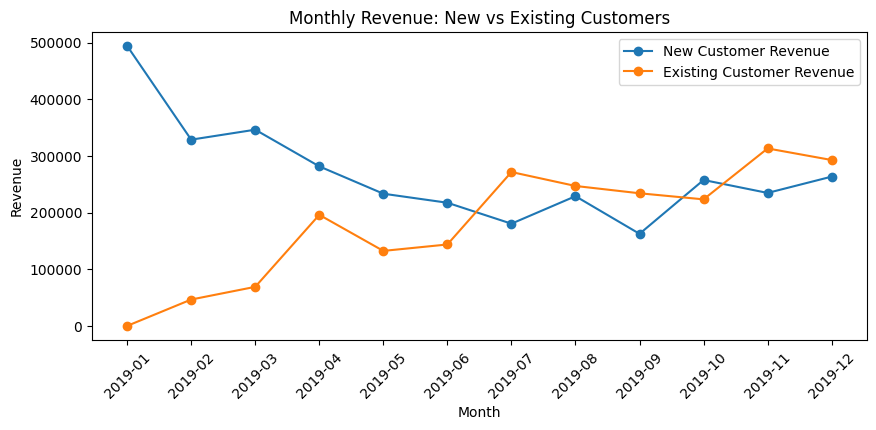

In [ ]:
# ------------------------------------------------------------
# Q3 Plot: Revenue trend from New vs Existing customers
# ------------------------------------------------------------

plt.figure(figsize=(10,4))
plt.plot(monthly_rev_pivot["Txn_Month"].astype(str), monthly_rev_pivot.get("New", 0), marker="o", label="New Customer Revenue")
plt.plot(monthly_rev_pivot["Txn_Month"].astype(str), monthly_rev_pivot.get("Existing", 0), marker="o", label="Existing Customer Revenue")
plt.xticks(rotation=45)
plt.title("Monthly Revenue: New vs Existing Customers")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend()
plt.show()

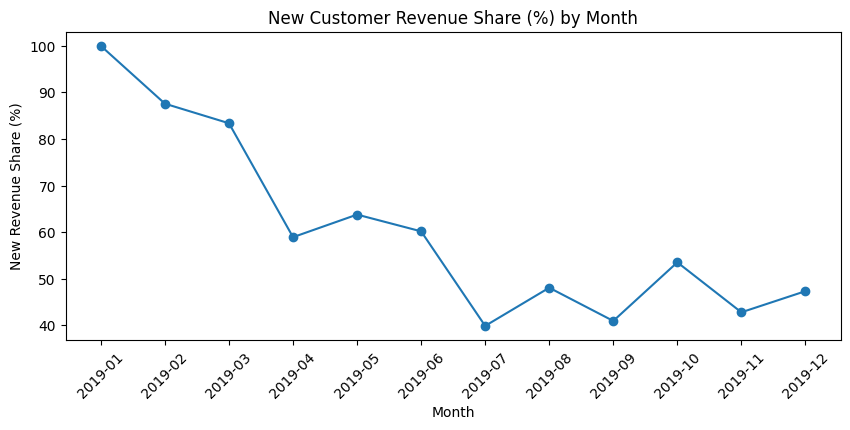

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(monthly_rev_pivot["Txn_Month"].astype(str), monthly_rev_pivot["New_Revenue_Share"]*100, marker="o")
plt.xticks(rotation=45)
plt.title("New Customer Revenue Share (%) by Month")
plt.xlabel("Month")
plt.ylabel("New Revenue Share (%)")
plt.show()

Q3.
**What this trend says about acquisition vs retention balance **
- Jan–Mar: Revenue is heavily driven by new customers. In Jan, existing-customer revenue is basically zero, and new customers contribute the vast majority of revenue through the first quarter. This shows the business is relying more on acquisition early in the year.
- Apr–Jun: Existing-customer revenue starts rising steadily, while new-customer revenue declines compared to the early months. This suggests customers acquired earlier are beginning to return and generate meaningful repeat revenue — retention is starting to show up.
- Jul: This is the turning point. Existing-customer revenue becomes stronger than new-customer revenue (and new customer revenue share drops to its lowest point). This indicates retention is strongest mid-year, and repeat purchases are carrying more of the total revenue.
- Aug–Dec: The revenue mix becomes more balanced. New and existing customer revenues stay closer, and the new-customer revenue share stays roughly around the mid range rather than returning to the early-year highs. That suggests retention remains stable, but it’s not compounding further month after month.

So overall, the trend suggests:
- Early in the year, the company is acquisition-led (new customers drive revenue).
- Mid-year, retention becomes strong enough to carry a bigger share of revenue (existing customers contribute more).
- Later in the year, the mix stabilizes, which is good, but it also hints that retention improvements may have plateaued — there’s room to strengthen repeat purchasing so existing-customer revenue grows more consistently.

Q4. Identify the top-performing products and analyze the factors driving their success. How can this insight inform inventory management and promotional strategies?

In [ ]:
# ------------------------------------------------------------
# Q4: Top-performing products (overall)
# Goal: Rank products by revenue / units / orders and capture
#       pricing + discount + coupon behavior to explain success.
# ------------------------------------------------------------

# Basic product performance metrics
product_perf = (
    sales.groupby(["Product_SKU", "Product_Description", "Product_Category"], dropna=False)
        .agg(
            Revenue=("Invoice_Value", "sum"),
            Units_Sold=("Quantity", "sum"),
            Orders=("Transaction_ID", "nunique"),
            Unique_Customers=("CustomerID", "nunique"),
            Avg_Unit_Price=("Avg_Price", "mean"),
            Avg_Discount_Pct=("Applied_Discount_Pct", "mean"),
            Coupon_Used_Rate=("Coupon_Status", lambda s: (s == "Used").mean())
        )
        .reset_index()
)

# Helpful derived metrics (for interpretation)
product_perf["AOV"] = product_perf["Revenue"] / product_perf["Orders"]          # average order value per transaction
product_perf["Revenue_per_Customer"] = product_perf["Revenue"] / product_perf["Unique_Customers"]

# Sort to find top products
top_products = product_perf.sort_values("Revenue", ascending=False)

top_products.head(10)

,Product_SKU,Product_Description,Product_Category,Revenue,Units_Sold,Orders,Unique_Customers,Avg_Unit_Price,Avg_Discount_Pct,Coupon_Used_Rate,AOV,Revenue_per_Customer
981,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,731870.78,4570,3511,952,150.981874,6.784392,0.342637,208.450806,768.771828
983,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,671619.74,5206,3328,950,121.806541,6.514423,0.328125,201.808816,706.968147
976,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,567867.43,4402,3230,953,120.214594,6.318885,0.319505,175.810350,595.873484
984,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,229032.98,2683,1361,642,79.838692,6.429096,0.337987,168.282866,356.749190
985,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,225275.88,2670,1065,567,79.748254,7.211268,0.369953,211.526648,397.311958
989,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,215902.92,1368,1089,542,149.644555,7.226814,0.351699,198.257961,398.344871
994,GGOENEBQ092299,Nest Secure Alarm System Starter Pack - USA,Nest,177940.26,510,498,262,351.287269,7.510040,0.325301,357.309759,679.161298
990,GGOENEBQ086499,Nest Cam IQ - USA,Nest,153869.98,771,599,331,199.916728,7.846411,0.348915,256.878097,464.863988
992,GGOENEBQ086799,Nest Thermostat E - USA,Nest,111834.16,1091,844,337,99.674384,6.990521,0.312796,132.504929,331.852107
980,GGOENEBD084799,Nest Learning Thermostat 3rd Gen-USA - Copper,Nest-USA,74563.43,472,393,280,149.556947,7.608142,0.348601,189.728830,266.297964


In [ ]:
# Top 10 products by revenue
top10_by_revenue = top_products.head(10)[
    ["Product_SKU","Product_Description","Product_Category","Revenue","Units_Sold","Orders","AOV","Avg_Discount_Pct","Coupon_Used_Rate"]
]

# Top 10 products by units sold (sometimes different from revenue leaders)
top10_by_units = product_perf.sort_values("Units_Sold", ascending=False).head(10)[
    ["Product_SKU","Product_Description","Product_Category","Units_Sold","Revenue","Orders","AOV","Avg_Discount_Pct","Coupon_Used_Rate"]
]

display(top10_by_revenue)
display(top10_by_units)

,Product_SKU,Product_Description,Product_Category,Revenue,Units_Sold,Orders,AOV,Avg_Discount_Pct,Coupon_Used_Rate
981,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,731870.78,4570,3511,208.450806,6.784392,0.342637
983,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,671619.74,5206,3328,201.808816,6.514423,0.328125
976,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,567867.43,4402,3230,175.810350,6.318885,0.319505
984,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,229032.98,2683,1361,168.282866,6.429096,0.337987
985,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,225275.88,2670,1065,211.526648,7.211268,0.369953
989,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,215902.92,1368,1089,198.257961,7.226814,0.351699
994,GGOENEBQ092299,Nest Secure Alarm System Starter Pack - USA,Nest,177940.26,510,498,357.309759,7.510040,0.325301
990,GGOENEBQ086499,Nest Cam IQ - USA,Nest,153869.98,771,599,256.878097,7.846411,0.348915
992,GGOENEBQ086799,Nest Thermostat E - USA,Nest,111834.16,1091,844,132.504929,6.990521,0.312796
980,GGOENEBD084799,Nest Learning Thermostat 3rd Gen-USA - Copper,Nest-USA,74563.43,472,393,189.728830,7.608142,0.348601


,Product_SKU,Product_Description,Product_Category,Units_Sold,Revenue,Orders,AOV,Avg_Discount_Pct,Coupon_Used_Rate
914,GGOEGGOA017399,Maze Pen,Office,16234,19786.11,374,52.904037,6.818182,0.331551
880,GGOEGDHC018299,Google 22 oz Water Bottle,Drinkware,9728,37418.88,583,64.183328,6.363636,0.329331
854,GGOEGBMJ013399,Sport Bag,Bags,7321,42068.43,408,103.108897,6.421569,0.318627
969,GGOEGOLC014299,Google Metallic Notebook Set,Office,6496,41481.61,378,109.739709,7.645503,0.359788
904,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,5847,24533.93,806,30.439119,6.885856,0.339950
907,GGOEGFSR022099,Google Kick Ball,Lifestyle,5549,15676.87,281,55.789573,6.085409,0.316726
983,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,5206,671619.74,3328,201.808816,6.514423,0.328125
908,GGOEGFYQ016599,Foam Can and Bottle Cooler,Drinkware,5098,11559.05,292,39.585788,7.089041,0.356164
942,GGOEGOAQ012899,Ballpoint LED Light Pen,Office,4861,15697.95,280,56.064107,7.500000,0.328571
981,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,4570,731870.78,3511,208.450806,6.784392,0.342637


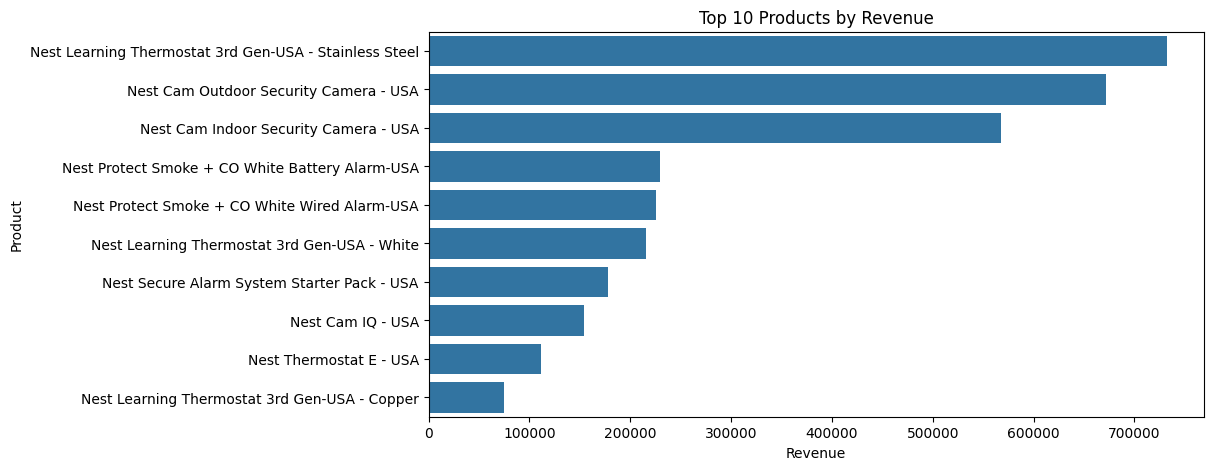

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=top10_by_revenue,
    y="Product_Description",
    x="Revenue"
)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()

In [ ]:
# Pick top 5 products by revenue
top5_skus = top_products["Product_SKU"].head(5)

product_monthly = (
    sales[sales["Product_SKU"].isin(top5_skus)]
      .groupby(["Month_Num", "Month", "Product_Description"])
      .agg(Revenue=("Invoice_Value","sum"), Units=("Quantity","sum"))
      .reset_index()
      .sort_values(["Month_Num"])
)

product_monthly.head(20)

,Month_Num,Month,Product_Description,Revenue,Units
0,1,Jan,Nest Cam Indoor Security Camera - USA,70190.92,513
1,1,Jan,Nest Cam Outdoor Security Camera - USA,71910.43,523
2,1,Jan,Nest Learning Thermostat 3rd Gen-USA - Stainle...,127282.97,748
3,1,Jan,Nest Protect Smoke + CO White Battery Alarm-USA,21568.57,235
4,1,Jan,Nest Protect Smoke + CO White Wired Alarm-USA,20991.94,231
5,2,Feb,Nest Cam Indoor Security Camera - USA,46094.30,358
6,2,Feb,Nest Cam Outdoor Security Camera - USA,58741.72,455
7,2,Feb,Nest Learning Thermostat 3rd Gen-USA - Stainle...,72382.85,448
8,2,Feb,Nest Protect Smoke + CO White Battery Alarm-USA,14634.04,169
9,2,Feb,Nest Protect Smoke + CO White Wired Alarm-USA,15453.76,182


**Answer 4.** From the product performance table, the top products by revenue are dominated by Nest-USA items (thermostats, cameras, protect/alarm systems). These products perform strongly because they combine high order volume with high average order value, so each transaction contributes meaningful revenue. In contrast, the top products by units sold are mostly lower-priced accessories (office and drinkware items like pens and water bottles). They move in high volume but contribute less revenue per order, which explains why they don’t appear as revenue leaders.

Discount and coupon usage is fairly consistent across products (around 6–8% average discount and ~30–37% coupon use), so performance seems driven more by product demand and price point than by aggressive promotions. For inventory, this suggests prioritizing safety stock for the high-revenue Nest SKUs (stock-outs here are costly) while managing unit leaders as fast-moving items with frequent replenishment. For promotions, it makes more sense to protect margins on premium products and use bundles or cross-sells, while using high-volume accessories as add-ons to increase basket size and improve overall revenue per order.

Q5. Segment customers into groups such as Premium, Gold, Silver, and Standard. What targeted strategies can be developed for each segment to improve retention and revenue? (Use RFM segmentation techniques)

RFM = Recency, Frequency, Monetary
- Recency: how recently a customer purchased (lower = better)
- Frequency: how often they purchased (higher = better)

We want one row per customer with three metrics:

- Recency → How recently the customer purchased
- Frequency → How often the customer purchased
- Monetary → How much the customer spent

This helps answer questions like:

- Who are our best customers?
- Who is at risk of churn?
- Who is new but promising?

In [ ]:
# ------------------------------------------------------------
# RFM Segmentation
# Assumptions:
# - sales has: CustomerID, Transaction_ID, Transaction_Date, Invoice_Value
# - Transaction_Date is datetime already
# ------------------------------------------------------------

# 1) Choose a reference date ("today") for Recency
# Using max transaction date + 1 day is a standard approach
snapshot_date = sales["Transaction_Date"].max() + pd.Timedelta(days=1)

# 2) Build RFM metrics per customer
rfm = (
    sales.groupby("CustomerID")
        .agg(
            Recency=("Transaction_Date", lambda x: (snapshot_date - x.max()).days),
            Frequency=("Transaction_ID", "nunique"),   # number of orders
            Monetary=("Invoice_Value", "sum")          # total revenue
        )
        .reset_index()
)

rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,108,1,174.98
1,12347,60,31,15686.83
2,12348,74,8,1689.54
3,12350,18,11,1467.45
4,12356,108,13,2007.39


In [ ]:
# ------------------------------------------------------------
# Basic sanity checks / cleanup
# Sometimes Invoice_Value can be 0/negative if there are returns, cancellations, or data issues.
# ------------------------------------------------------------
rfm["Monetary"] = rfm["Monetary"].clip(lower=0)  # keep Monetary non-negative

# Optional quick checks
rfm[["Recency", "Frequency", "Monetary"]].describe()

,Recency,Frequency,Monetary
count,1468.000000,1468.000000,1468.000000
mean,145.292234,18.141008,3676.679169
std,101.936959,24.976414,5846.087936
min,1.000000,1.000000,6.990000
25%,56.000000,5.000000,783.967500
50%,132.000000,11.000000,2011.630000
75%,221.000000,23.000000,4495.067500
max,365.000000,328.000000,87201.050000


In [ ]:
# ------------------------------------------------------------
# Scoring (1 to 4) using quantiles
# ------------------------------------------------------------

# Recency: smaller is better so labels are reversed
rfm["R_Score"] = pd.qcut(rfm["Recency"], q=4, labels=[4,3,2,1]).astype(int)

# Frequency and Monetary: bigger is better
#Why the rank(method="first")?
#	•	If many customers have the same Frequency/Monetary value, qcut can fail. Ranking makes it stable.
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), q=4, labels=[1,2,3,4]).astype(int)
rfm["M_Score"] = pd.qcut(rfm["Monetary"].rank(method="first"), q=4, labels=[1,2,3,4]).astype(int)

# Combine
rfm["RFM_Score"] = rfm["R_Score"] + rfm["F_Score"] + rfm["M_Score"]

rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346,108,1,174.98,3,1,1,5
1,12347,60,31,15686.83,3,4,4,11
2,12348,74,8,1689.54,3,2,2,7
3,12350,18,11,1467.45,4,2,2,8
4,12356,108,13,2007.39,3,3,2,8


In [ ]:
# ------------------------------------------------------------
# Segment mapping
# ------------------------------------------------------------
def segment_label(score):
    if score >= 10:
        return "Premium"
    elif score >= 8:
        return "Gold"
    elif score >= 6:
        return "Silver"
    else:
        return "Standard"

rfm["Segment"] = rfm["RFM_Score"].apply(segment_label)

rfm["Segment"].value_counts()

,count
Segment,
Premium,408
Standard,407
Silver,341
Gold,312


In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346,108,1,174.98,3,1,1,5,Standard
1,12347,60,31,15686.83,3,4,4,11,Premium
2,12348,74,8,1689.54,3,2,2,7,Silver
3,12350,18,11,1467.45,4,2,2,8,Gold
4,12356,108,13,2007.39,3,3,2,8,Gold


In [ ]:
# ------------------------------------------------------------
# Segment performance summary
# ------------------------------------------------------------
segment_summary = (
    rfm.groupby("Segment")
       .agg(
           Customers=("CustomerID", "nunique"),
           Avg_Recency=("Recency", "mean"),
           Avg_Frequency=("Frequency", "mean"),
           Avg_Monetary=("Monetary", "mean"),
           Total_Revenue=("Monetary", "sum")
       )
       .sort_values("Total_Revenue", ascending=False)
       .reset_index()
)

segment_summary

,Segment,Customers,Avg_Recency,Avg_Frequency,Avg_Monetary,Total_Revenue
0,Premium,408,63.406863,40.267157,8449.662206,3447462.18
1,Gold,312,142.153846,18.439103,3800.823718,1185857.00
2,Silver,341,154.266862,8.838710,1572.913842,536363.62
3,Standard,407,222.265356,3.525799,559.415774,227682.22


**Answer 5: **
Targeted strategies by segment (based on what the metrics are telling us):

**- Premium (high value + most active)**

What we see: lowest recency (63 days) + very high frequency (40) + highest monetary.

What we should do: protect this base and increase basket size without heavy discounts.

	Actions:
	- Early-access launches, exclusive bundles, VIP support/shipping perks.
	- Personalised recommendations based on last category/SKU.
	- Loyalty rewards focused on perks (free shipping, priority delivery) rather than price cuts.

**- Gold (good customers, but cooling off)**

What we see: frequency is strong (18) but recency is much higher than Premium (142 days). So they buy, but they’re not coming back as quickly.

What we should do: pull them back sooner and push them toward Premium behaviour.

	Actions:
	- “Come back” nudges + limited-time bundles (instead of broad discounts).
	- Tier-up messaging: spend X more / buy Y times to unlock Premium benefits.
	- Category-based promos (only in categories they already buy).

- **Silver (mid customers, low repeat)**

What we see: frequency drops to 9 and recency is still high (154 days). This segment needs habit-building.

What we should do: improve repeat rate (second and third purchase).

	**Actions:**
	- Post-purchase flow: day 7 recommendations → day 21 reminder → day 30 small incentive.
	- Reorder prompts (especially if products are repeatable/consumable).
	- Free-shipping threshold to encourage the next order.

**- Standard (lowest value + most inactive)**

What we see: highest recency (222 days) + lowest frequency (3.5) + very low monetary (559).

What we should do: either reactivate cheaply or don’t over-invest.

	Actions:
	- Simple win-back: “best sellers under X”, “welcome back” credit, small free-shipping offer.
	- Focus on low-cost channels (email/WhatsApp/push), not paid ads.
	- Identify one-time promo buyers and avoid giving big discounts repeatedly.

What this suggests overall:
- Revenue is heavily dependent on retained + repeat customers (Premium + Gold make up ~86% of revenue).
- That means we shouldn’t treat acquisition as the only lever. It’s worth putting effort into moving Silver → Gold and Gold → Premium, because the revenue jump is huge.
- Standard customers are many in count, but contribute very little revenue, so we should keep those retention efforts lightweight and targeted.

Q6. Analyze the revenue contribution of each customer segment. How can the company focus its efforts on high-value segments while nurturing lower-value segments?

In [ ]:
# ------------------------------------------------------------
# Q6: Revenue contribution by segment (share % + revenue/customer)
# ------------------------------------------------------------

# Total revenue across all segments
total_revenue_all = segment_summary["Total_Revenue"].sum()

# Revenue share (%) of each segment
segment_summary["Revenue_Share_%"] = (segment_summary["Total_Revenue"] / total_revenue_all) * 100

# Revenue per customer (helps compare Premium vs Standard fairly)
segment_summary["Revenue_per_Customer"] = segment_summary["Total_Revenue"] / segment_summary["Customers"]

# Optional: round for clean display
segment_summary[["Avg_Recency","Avg_Frequency","Avg_Monetary","Total_Revenue","Revenue_Share_%","Revenue_per_Customer"]] = (
    segment_summary[["Avg_Recency","Avg_Frequency","Avg_Monetary","Total_Revenue","Revenue_Share_%","Revenue_per_Customer"]]
    .round(2)
)

# Show the final table for Q6
segment_summary.sort_values("Total_Revenue", ascending=False)

,Segment,Customers,Avg_Recency,Avg_Frequency,Avg_Monetary,Total_Revenue,Revenue_Share_%,Revenue_per_Customer
0,Premium,408,63.41,40.27,8449.66,3447462.18,63.87,8449.66
1,Gold,312,142.15,18.44,3800.82,1185857.00,21.97,3800.82
2,Silver,341,154.27,8.84,1572.91,536363.62,9.94,1572.91
3,Standard,407,222.27,3.53,559.42,227682.22,4.22,559.42


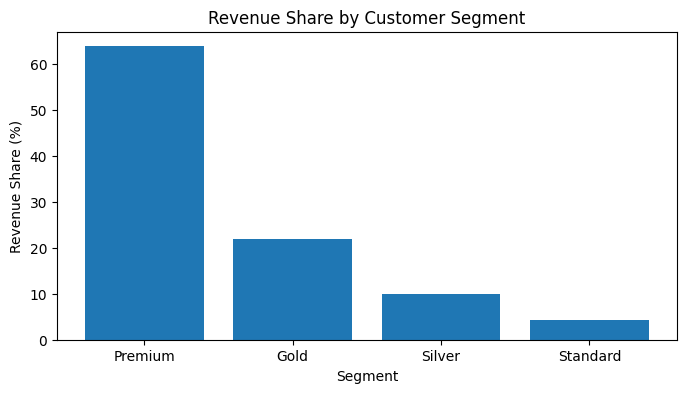

In [ ]:
plot_df = segment_summary.sort_values("Revenue_Share_%", ascending=False)

plt.figure(figsize=(8,4))
plt.bar(plot_df["Segment"], plot_df["Revenue_Share_%"])
plt.title("Revenue Share by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Revenue Share (%)")
plt.show()

Premium customers (408) contribute the majority of revenue — 63.87% — and they are also the most engaged segment (lowest recency ~63 days and highest frequency ~40). Gold contributes 21.97% and is the best upgrade opportunity because they still spend well but are far less recent than Premium (recency ~142 days). Silver and Standard together make up a large portion of customers but contribute relatively little revenue (9.94% + 4.22%), and their recency is much worse, which indicates churn risk.

Based on this, efforts should prioritize protecting Premium (VIP experience, personalized upsell, avoid heavy discounting), upgrading Gold into Premium (reorder nudges + tiered rewards), and running low-cost reactivation for Silver/Standard with automated campaigns and entry bundles.

Q7. Group customers by their month of first purchase and analyze retention rates over time. Which cohorts exhibit the highest and lowest retention rates? What strategies can be implemented to improve retention for weaker cohorts?

In [ ]:
# ------------------------------------------------------------
# Q7: Cohort Retention (Customers grouped by FIRST purchase month)
# Goal:
#   For each cohort (First_Txn_Month), measure what % of that cohort
#   comes back in Month+1, Month+2, etc.
# Output:
#   1) cohort_counts  -> counts of active customers per cohort per month index
#   2) cohort_retention -> retention rates (%) matrix
# ------------------------------------------------------------

# Keep only the columns needed for cohort analysis.
# Why drop duplicates?
# - A customer can place multiple orders in the same month.
# - For retention, we only care whether they were "active" that month (yes/no).
cohort_base = sales[["CustomerID", "First_Txn_Month", "Txn_Month"]].dropna().copy()
cohort_base = cohort_base.drop_duplicates(subset=["CustomerID", "First_Txn_Month", "Txn_Month"])

In [ ]:
# Convert month labels to real monthly timestamps (easier to compute month offsets)
cohort_base["First_Txn_Month"] = cohort_base["First_Txn_Month"].dt.to_timestamp()
cohort_base["Txn_Month"] = cohort_base["Txn_Month"].dt.to_timestamp()

In [ ]:
#
# Month_Index = months between Txn_Month and First_Txn_Month
# Example:
#   First_Txn_Month = 2019-01, Txn_Month = 2019-03 -> Month_Index = 2
cohort_base["Month_Index"] = (
    (cohort_base["Txn_Month"].dt.year - cohort_base["First_Txn_Month"].dt.year) * 12
    + (cohort_base["Txn_Month"].dt.month - cohort_base["First_Txn_Month"].dt.month)
)

cohort_base.head()

,CustomerID,First_Txn_Month,Txn_Month,Month_Index
0,17850,2019-01-01,2019-01-01,0
9,13047,2019-01-01,2019-01-01,0
26,12583,2019-01-01,2019-01-01,0
46,13748,2019-01-01,2019-01-01,0
65,15100,2019-01-01,2019-01-01,0


In [ ]:
# Count UNIQUE customers per cohort per month_index
# Output is long format: one row per cohort-month_index combo
cohort_counts = (
    cohort_base.groupby(["First_Txn_Month", "Month_Index"])["CustomerID"]
    .nunique()
    .reset_index(name="Customers")
)

cohort_counts.head(20)

,First_Txn_Month,Month_Index,Customers
0,2019-01-01,0,215
1,2019-01-01,1,13
2,2019-01-01,2,24
3,2019-01-01,3,34
4,2019-01-01,4,23
5,2019-01-01,5,44
6,2019-01-01,6,35
7,2019-01-01,7,47
8,2019-01-01,8,23
9,2019-01-01,9,28


In [ ]:
# Pivot to matrix form:
# rows = cohort month (First_Txn_Month)
# cols = Month_Index (0,1,2,...)
# values = number of active customers
cohort_matrix = cohort_counts.pivot(index="First_Txn_Month", columns="Month_Index", values="Customers")

# Cohort size = Month_Index 0
# (customers acquired in that cohort month)
cohort_sizes = cohort_matrix[0]

# Retention (%) = customers in month_index / cohort_size * 100
cohort_retention = cohort_matrix.divide(cohort_sizes, axis=0) * 100

cohort_retention.head()

Month_Index,0,1,2,3,4,5,6,7,8,9,10,11
First_Txn_Month,,,,,,,,,,,,
2019-01-01,100.0,6.046512,11.162791,15.813953,10.697674,20.465116,16.279070,21.860465,10.697674,13.023256,9.302326,15.813953
2019-02-01,100.0,7.291667,9.375000,16.666667,17.708333,22.916667,19.791667,15.625000,12.500000,11.458333,16.666667,NaN
2019-03-01,100.0,10.169492,19.774011,14.124294,18.079096,18.644068,12.429379,12.429379,8.474576,10.734463,NaN,NaN
2019-04-01,100.0,8.588957,14.723926,14.723926,11.042945,9.202454,6.134969,9.815951,7.361963,NaN,NaN,NaN
2019-05-01,100.0,10.714286,8.035714,11.607143,8.928571,11.607143,12.500000,7.142857,NaN,NaN,NaN,NaN


In [ ]:
# Make cohort month readable (YYYY-MM)
cohort_retention.index = cohort_retention.index.to_period("M").astype(str)
cohort_retention.round(2).head()

Month_Index,0,1,2,3,4,5,6,7,8,9,10,11
First_Txn_Month,,,,,,,,,,,,
2019-01,100.0,6.05,11.16,15.81,10.70,20.47,16.28,21.86,10.70,13.02,9.30,15.81
2019-02,100.0,7.29,9.38,16.67,17.71,22.92,19.79,15.62,12.50,11.46,16.67,NaN
2019-03,100.0,10.17,19.77,14.12,18.08,18.64,12.43,12.43,8.47,10.73,NaN,NaN
2019-04,100.0,8.59,14.72,14.72,11.04,9.20,6.13,9.82,7.36,NaN,NaN,NaN
2019-05,100.0,10.71,8.04,11.61,8.93,11.61,12.50,7.14,NaN,NaN,NaN,NaN


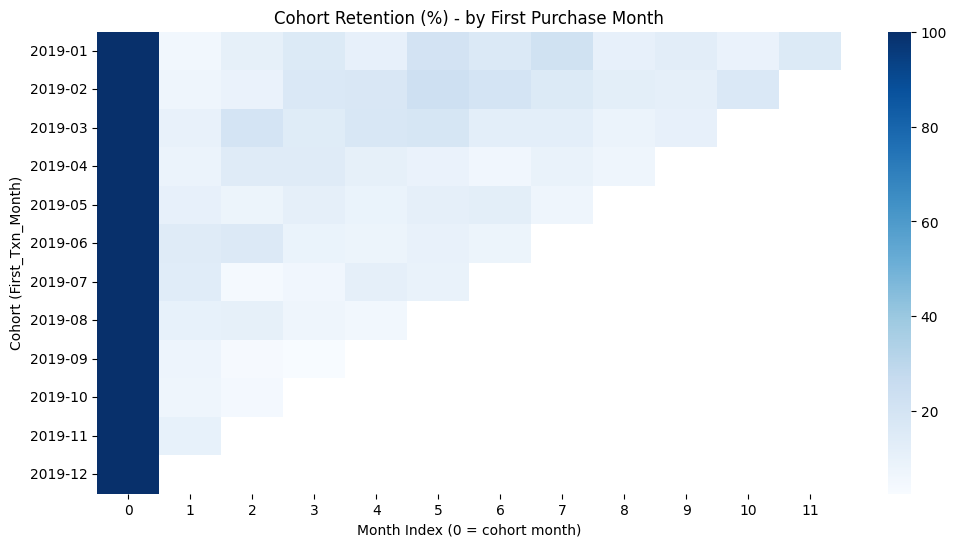

In [ ]:
# ------------------------------------------------------------
# Visualize cohort retention as a heatmap
# Darker = higher retention.
# Note: later cohorts (e.g., Nov/Dec) will have fewer future months,
# so they'll show more blanks/zeros simply due to dataset ending.
# ------------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.heatmap(cohort_retention.round(1), annot=False, cmap="Blues")
plt.title("Cohort Retention (%) - by First Purchase Month")
plt.xlabel("Month Index (0 = cohort month)")
plt.ylabel("Cohort (First_Txn_Month)")
plt.show()

In [ ]:
# ------------------------------------------------------------
# Month+1 retention (most common cohort benchmark)
# WARNING: Dec cohort may look like 0% if we don't have next year's data.
# ------------------------------------------------------------
m1 = cohort_retention.get(1)  # column 1 might not exist if data is too short
m1 = m1.dropna()

best_cohort = m1.idxmax()
worst_cohort = m1.idxmin()

best_val = m1.max()
worst_val = m1.min()

best_cohort, best_val, worst_cohort, worst_val

('2019-06', 14.5985401459854, '2019-01', 6.046511627906977)

In [ ]:
# ------------------------------------------------------------
# Avg retention over months 1 to 3 gives a more stable measure
# (reduces noise of a single month).
# ------------------------------------------------------------
cols = [c for c in [1,2,3] if c in cohort_retention.columns]
cohort_retention["Avg_1_to_3"] = cohort_retention[cols].mean(axis=1)

cohort_retention["Avg_1_to_3"].sort_values(ascending=False).head(5), \
cohort_retention["Avg_1_to_3"].sort_values().head(5)

(First_Txn_Month
 2019-03    14.689266
 2019-06    13.138686
 2019-04    12.678937
 2019-02    11.111111
 2019-01    11.007752
 Name: Avg_1_to_3, dtype: float64,
 First_Txn_Month
 2019-09     4.700855
 2019-10     5.747126
 2019-07     8.156028
 2019-08     9.629630
 2019-05    10.119048
 Name: Avg_1_to_3, dtype: float64)

In [ ]:
# ------------------------------------------------------------
# Drill-down: what did the weakest cohort buy?
# Step 1: get customers from the weakest cohort month
# Step 2: check which categories they bought
# Step 3: check coupon behavior (Clicked vs Used vs Not Used)
# ------------------------------------------------------------
weak = worst_cohort  # from earlier cell
weak_month = pd.to_datetime(weak)

weak_customers = cohort_base.loc[cohort_base["First_Txn_Month"] == weak_month, "CustomerID"].unique()

sales[sales["CustomerID"].isin(weak_customers)].groupby("Product_Category")["CustomerID"].nunique().sort_values(ascending=False).head(10)

,CustomerID
Product_Category,
Nest-USA,194
Apparel,191
Office,164
Drinkware,154
Lifestyle,128
Bags,116
Headgear,63
Notebooks & Journals,63
Waze,54


In [ ]:
#Did they rely more on discounts/coupons?
sales[sales["CustomerID"].isin(weak_customers)]["Coupon_Status"].value_counts(normalize=True)

,proportion
Coupon_Status,
Clicked,0.505120
Used,0.343573
Not Used,0.151307


Answer 7: We created cohorts using First_Txn_Month (month of first purchase) and measured retention using Month_Index (0 = cohort month, 1 = next month, etc.).

Highest retention cohorts
- Using Avg retention for Month+1 to Month+3 (Avg_1_to_3), the strongest cohorts are 2019-03 (14.69%), 2019-06 (13.14%), and 2019-04 (12.68%).

Lowest retention cohorts
- The weakest (true) cohorts by Avg_1_to_3 are 2019-11 (3.43%), 2019-10 (3.83%), and 2019-09 (4.70%).
- Note: 2019-12 shows 0% for Month+1 only because the dataset ends in Dec (no next month), so it’s not a real “weak cohort.”

What this suggests
- Acquisition quality and/or customer experience differs by month. Some cohorts return much more in the first 1–3 months than others.

Strategies to improve weaker cohorts (Sep–Nov)
- Strengthen “second purchase” flow in the first 30 days (follow-up + recommended add-ons).
- Reduce coupon drop-off (many Clicked vs fewer Used) by making coupons easier to redeem (auto-apply, fewer restrictions).
- Use category-based nudges based on top weak-cohort categories (Nest-USA, Apparel, Nest, Office) with bundles and related-product recommendations.

**Q8. Analyze the lifetime value of customers acquired in different months. How can this insight inform acquisition and retention strategies?**

In [ ]:
# Q8: Lifetime Value (LTV) by acquisition month (First_Txn_Month)
# LTV here = total revenue generated by that cohort during the dataset / number of customers in that cohort

cohort_ltv = (
    sales.groupby("First_Txn_Month")
        .agg(
            Customers=("CustomerID", "nunique"),
            Total_Revenue=("Invoice_Value", "sum"),
            Orders=("Transaction_ID", "nunique"),
        )
        .reset_index()
)

cohort_ltv["LTV_per_Customer"] = (cohort_ltv["Total_Revenue"] / cohort_ltv["Customers"]).round(2)
cohort_ltv["Revenue_per_Order"] = (cohort_ltv["Total_Revenue"] / cohort_ltv["Orders"]).round(2)

cohort_ltv.sort_values("LTV_per_Customer", ascending=False).head(10)

,First_Txn_Month,Customers,Total_Revenue,Orders,LTV_per_Customer,Revenue_per_Order
1,2019-02,96,636074.00,3054,6625.77,208.28
0,2019-01,215,1227511.73,5416,5709.36,226.65
2,2019-03,177,769308.89,3646,4346.38,211.00
10,2019-11,68,239551.00,1065,3522.81,224.93
4,2019-05,112,386307.36,2174,3449.17,177.69
3,2019-04,163,523464.76,2395,3211.44,218.57
9,2019-10,87,270950.29,1182,3114.37,229.23
6,2019-07,94,277810.85,1409,2955.43,197.17
11,2019-12,106,263416.18,1288,2485.06,204.52
5,2019-06,137,332682.06,1829,2428.34,181.89


In [ ]:
# 0–30 day LTV: compare cohorts fairly by limiting to first 30 days after first purchase
first_date = sales.groupby("CustomerID")["Transaction_Date"].min()
sales_tmp = sales.copy()
sales_tmp["First_Date"] = sales_tmp["CustomerID"].map(first_date)
sales_tmp["Days_Since_First"] = (sales_tmp["Transaction_Date"] - sales_tmp["First_Date"]).dt.days

cohort_ltv_30 = (
    sales_tmp[sales_tmp["Days_Since_First"].between(0, 30)]
      .groupby("First_Txn_Month")
      .agg(Customers=("CustomerID", "nunique"),
           Revenue_30d=("Invoice_Value", "sum"))
      .reset_index()
)

cohort_ltv_30["LTV_30d_per_Customer"] = (cohort_ltv_30["Revenue_30d"] / cohort_ltv_30["Customers"]).round(2)
cohort_ltv_30.sort_values("LTV_30d_per_Customer", ascending=False).head(10)

,First_Txn_Month,Customers,Revenue_30d,LTV_30d_per_Customer
10,2019-11,68,239438.54,3521.16
1,2019-02,96,330390.06,3441.56
9,2019-10,87,267692.84,3076.93
11,2019-12,106,263416.18,2485.06
0,2019-01,215,510239.05,2373.20
4,2019-05,112,236433.48,2111.01
8,2019-09,78,164528.10,2109.33
2,2019-03,177,365423.86,2064.54
6,2019-07,94,182297.70,1939.34
3,2019-04,163,293131.43,1798.35


Answer 8:
- Customers acquired in Feb (2019-02) have the highest LTV per customer (6626), followed by Jan (5709). This suggests acquisition during these months brought in customers who either purchased higher-value products or returned more frequently over time.
- Using a fairer comparison window (first 30 days), cohorts acquired in Nov and Feb show the strongest early value (~3521 and ~3442 30-day LTV per customer). This indicates campaigns/seasonality in these months attract customers who spend quickly after acquisition.
-	Cohorts like Apr/Jul show weaker 30-day value (~1798–1939), suggesting either lower initial basket size, less repeat within the first month, or a different product mix.

How this informs strategy:
- For acquisition: prioritize channels/campaigns that drove Feb/Nov cohorts, because they generate more value early (better payback).
- For retention: for weaker cohorts (e.g., Apr/Jul), run stronger first-30-day retention flows (repeat-purchase nudges, bundles, category-based recommendations), because improving early repeat will lift both 30-day LTV and long-term LTV.

Q9. Identify seasonal trends in sales by category and location. How can the company prepare for peak and off-peak seasons to maximize revenue?

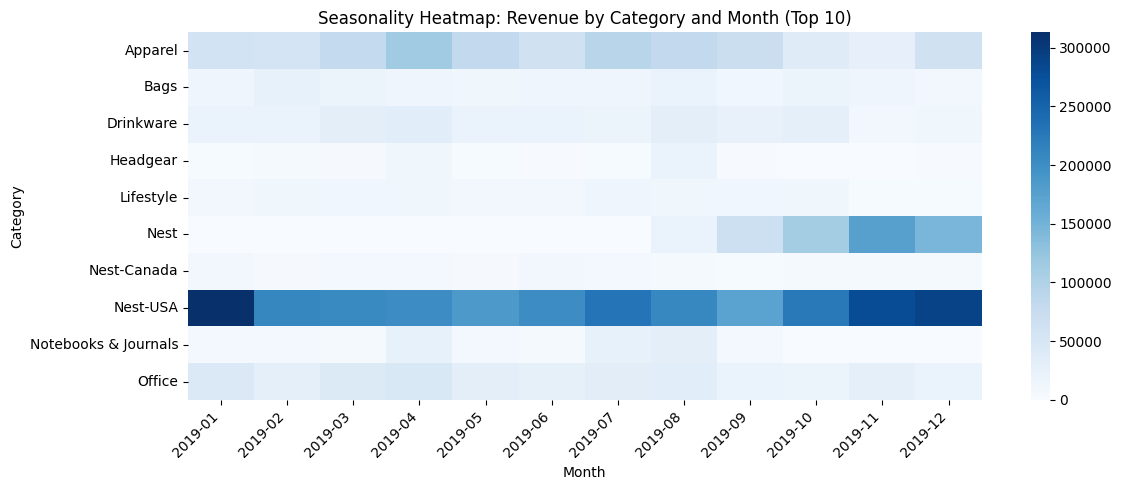

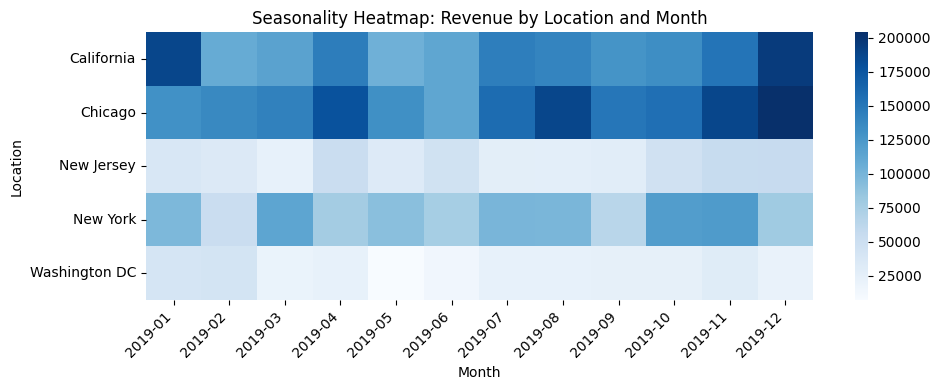

,Txn_Month,Product_Category,Revenue
182,2019-11,Accessories,2374.93
112,2019-07,Accessories,2051.17
166,2019-10,Accessories,1877.03
38,2019-03,Android,248.54
95,2019-06,Android,231.22


,Txn_Month,Location,Revenue
55,2019-12,California,194942.18
0,2019-01,California,187725.85
50,2019-11,California,152140.68
56,2019-12,Chicago,204078.00
51,2019-11,Chicago,187809.35


In [ ]:
# 1) attach location
sales_loc = sales.merge(customers[["CustomerID","Location"]], on="CustomerID", how="left")

# 2) month bucket
sales_loc["Txn_Month"] = sales_loc["Transaction_Date"].dt.to_period("M")

# -----------------------------
# A) Category seasonality (Top 10)
# -----------------------------
cat_month = (sales_loc.groupby(["Txn_Month","Product_Category"], as_index=False)["Invoice_Value"]
             .sum().rename(columns={"Invoice_Value":"Revenue"}))

top_cats = (cat_month.groupby("Product_Category")["Revenue"]
            .sum().sort_values(ascending=False).head(10).index)

heat_cat = (cat_month[cat_month["Product_Category"].isin(top_cats)]
            .pivot(index="Product_Category", columns="Txn_Month", values="Revenue")
            .fillna(0))

heat_cat.columns = heat_cat.columns.astype(str)

plt.figure(figsize=(12,5))
sns.heatmap(heat_cat, cmap="Blues")
plt.title("Seasonality Heatmap: Revenue by Category and Month (Top 10)")
plt.xlabel("Month")
plt.ylabel("Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# -----------------------------
# B) Location seasonality
# -----------------------------
loc_month = (sales_loc.groupby(["Txn_Month","Location"], as_index=False)["Invoice_Value"]
             .sum().rename(columns={"Invoice_Value":"Revenue"}))

heat_loc = (loc_month.pivot(index="Location", columns="Txn_Month", values="Revenue")
            .fillna(0))

heat_loc.columns = heat_loc.columns.astype(str)

plt.figure(figsize=(10,4))
sns.heatmap(heat_loc, cmap="Blues")
plt.title("Seasonality Heatmap: Revenue by Location and Month")
plt.xlabel("Month")
plt.ylabel("Location")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# -----------------------------
# C) Peak months tables (top 3)
# -----------------------------
peak_months_by_category = (
    cat_month.sort_values(["Product_Category","Revenue"], ascending=[True, False])
    .groupby("Product_Category").head(3)
)
display(peak_months_by_category.head(5))

peak_months_by_location = (
    loc_month.sort_values(["Location","Revenue"], ascending=[True, False])
    .groupby("Location").head(3)
)
display(peak_months_by_location.head(5))

**Seasonal trends (Category):**
From the category-by-month heatmap, revenue is not evenly distributed across the year. Some categories show clear peaks in specific months. For example, Nest-USA contributes consistently high revenue across most months, while categories like Nest show stronger performance in later months (around Sep–Dec). Using the “top 3 peak months per category” table helps pinpoint when each category performs best.

**Seasonal trends (Location):**
The location heatmap shows that California and Chicago are the strongest markets overall and peak toward the end of the year (notably Nov–Dec). New Jersey and Washington DC contribute lower revenue across most months, while New York stays mid-range with some month-to-month variation.

**How to prepare for peak seasons:**
- Pre-stock inventory for categories that peak in upcoming months (avoid stockouts).
- Increase ad spend and run category-specific campaigns 1–2 months before peak months.
- Improve fulfilment capacity (delivery staffing, faster shipping options) for top locations during peak months.
- Reduce heavy discounting during natural peak demand to protect margins.

**How to maximize revenue in off-peak seasons:**
- Run targeted offers on low-season categories (bundles, free delivery thresholds, limited-time coupons).
- Cross-sell from strong categories (e.g., bundle accessories with high-demand items).
- Focus retention campaigns (email/push) in low-demand months to bring repeat purchases.
- Shift marketing budgets toward the locations/categories that still perform relatively better in off-peak periods.

**Q10. Analyze daily sales trends to identify high-performing and low-performing days. What strategies can be implemented to boost sales on slower days?**

In [ ]:
# ------------------------------------------------------------
# Q10: Daily Sales Trends
# Goal:
#   Build day-level KPIs (Revenue, Orders, Customers, Units)
#   to find high-performing vs low-performing days.
# ------------------------------------------------------------

# Ensure Transaction_Date is datetime (safe check)
sales["Transaction_Date"] = pd.to_datetime(sales["Transaction_Date"], errors="coerce")

# Create a pure date column (drops time if any)
sales["Txn_Date"] = sales["Transaction_Date"].dt.date

# Daily KPIs
daily_sales = (
    sales.groupby("Txn_Date", as_index=False)
        .agg(
            Revenue=("Invoice_Value", "sum"),
            Orders=("Transaction_ID", "nunique"),
            Customers=("CustomerID", "nunique"),
            Units=("Quantity", "sum")
        )
)

In [ ]:
daily_sales.head()

,Txn_Date,Revenue,Orders,Customers,Units
0,2019-01-01,9039.39,41,7,352
1,2019-01-02,15269.35,71,10,256
2,2019-01-03,29145.64,124,14,816
3,2019-01-04,19500.20,89,6,604
4,2019-01-05,21260.23,91,9,2392


In [ ]:
# Add weekday name + weekday number (Mon=0 ... Sun=6)
daily_sales["Txn_Date"] = pd.to_datetime(daily_sales["Txn_Date"])
daily_sales["Weekday"] = daily_sales["Txn_Date"].dt.day_name()
daily_sales["Weekday_Num"] = daily_sales["Txn_Date"].dt.weekday

# Weekday-level summary
weekday_summary = (
    daily_sales.groupby(["Weekday_Num", "Weekday"], as_index=False)
        .agg(
            Avg_Revenue=("Revenue", "mean"),
            Median_Revenue=("Revenue", "median"),
            Avg_Orders=("Orders", "mean"),
            Avg_Customers=("Customers", "mean")
        )
        .sort_values("Weekday_Num")
)

In [ ]:
weekday_summary

,Weekday_Num,Weekday,Avg_Revenue,Median_Revenue,Avg_Orders,Avg_Customers
0,0,Monday,7936.205577,7299.185,40.961538,5.750000
1,1,Tuesday,8494.985472,8643.990,43.679245,5.849057
2,2,Wednesday,18390.559231,17714.345,84.192308,10.480769
3,3,Thursday,18740.643077,17926.410,82.269231,10.307692
4,4,Friday,19206.223846,17295.480,81.403846,11.096154
5,5,Saturday,15214.126154,13976.805,74.461538,9.153846
6,6,Sunday,15649.372692,14942.690,74.134615,8.942308


In [ ]:
top_days = weekday_summary.sort_values("Avg_Revenue", ascending=False).head(3)
low_days = weekday_summary.sort_values("Avg_Revenue", ascending=True).head(3)

top_days[["Weekday","Avg_Revenue","Avg_Orders","Avg_Customers"]], low_days[["Weekday","Avg_Revenue","Avg_Orders","Avg_Customers"]]

(     Weekday   Avg_Revenue  Avg_Orders  Avg_Customers
 4     Friday  19206.223846   81.403846      11.096154
 3   Thursday  18740.643077   82.269231      10.307692
 2  Wednesday  18390.559231   84.192308      10.480769,
     Weekday   Avg_Revenue  Avg_Orders  Avg_Customers
 0    Monday   7936.205577   40.961538       5.750000
 1   Tuesday   8494.985472   43.679245       5.849057
 5  Saturday  15214.126154   74.461538       9.153846)

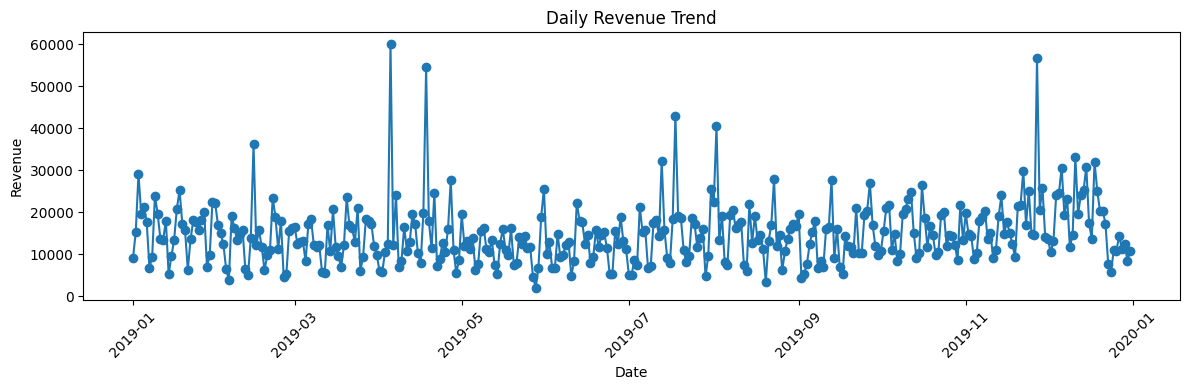

In [ ]:
# Daily trend (time series)
plt.figure(figsize=(12,4))
plt.plot(daily_sales["Txn_Date"], daily_sales["Revenue"], marker="o")
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


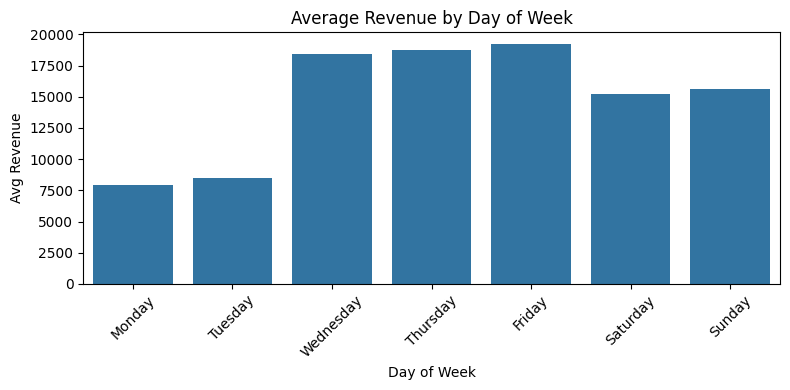

In [ ]:
# Average revenue by weekday (bar chart)
plt.figure(figsize=(8,4))
sns.barplot(data=weekday_summary, x="Weekday", y="Avg_Revenue")
plt.title("Average Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Avg Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Answer 10:**
Top-performing weekdays (by Avg_Revenue):
- Friday ~ 19.2k
- Thursday ~ 18.7k
- Wednesday ~ 18.4k

These days also have the highest Avg_Orders (81–84) and Avg_Customers (10–11), so performance is coming from both more customers and more orders.

Low-performing weekdays:
- Monday ~ 7.9k (lowest)
- Tuesday ~ 8.5k
- Saturday ~ 15.2k (lower than Wed–Fri, but much stronger than Mon/Tue)

So the pattern is clear: mid-week is strong (Wed–Fri), early-week is weak (Mon/Tue), and weekend is “middle”.


What strategies can boost sales on slower days (Mon/Tue)

1) “Start-of-week” offers (small, controlled discounts)
- Limited-time Mon/Tue flash deals
- “Spend X, get Y off” (protects margin better than flat discounts)
- Free shipping on Mon/Tue only (often works better than % discount)

2) Move demand from peak days to slow days
- If Wed–Fri is already strong, we can shift some demand:
- “Order on Monday, delivery by Wednesday” incentives
- Early-week bundle packs (e.g., accessories + core item)

3) Target the right customers
- For existing customers: reminder + loyalty points multiplier on Mon/Tue
- For new customers: first-order coupon valid only Mon/Tue (helps acquisition and weekday smoothing)

4) Push the right products on slow days
- Feature best-sellers (low decision friction)
- Pair slow-moving inventory with top products (bundle/upsell)

5) Test messaging + timing
- Run email/push campaigns Mon morning and Tue evening
- A/B test subject lines and offers:
- “Free Shipping Today”
- “Mon-only deal ends tonight”